# t-distributed Stochastic Neighbor Embedding

In [1]:
# Continued from pca
import os
import joblib
from sklearn.datasets import fetch_openml

# Define the file path for caching
dataset_path = 'mnist_784.pkl'

# Function to fetch and save the dataset
def fetch_and_cache_mnist(dataset_path):
    if os.path.exists(dataset_path):
        # Load the dataset from the file
        mnist = joblib.load(dataset_path)
        print("Loaded dataset from cache.")
    else:
        # Fetch the dataset from the server
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        # Save the dataset to the file
        joblib.dump(mnist, dataset_path)
        print("Fetched and cached the dataset.")
    return mnist

# Fetch and cache the dataset
mnist = fetch_and_cache_mnist(dataset_path)

# Use the dataset
X, y = mnist.data, mnist.target
from sklearn.utils import resample
X_sample, y_sample = resample(X, y, n_samples=2000, random_state=42, stratify=y)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fetched and cached the dataset.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

In [22]:
X_tsne.shape

(2000, 2)

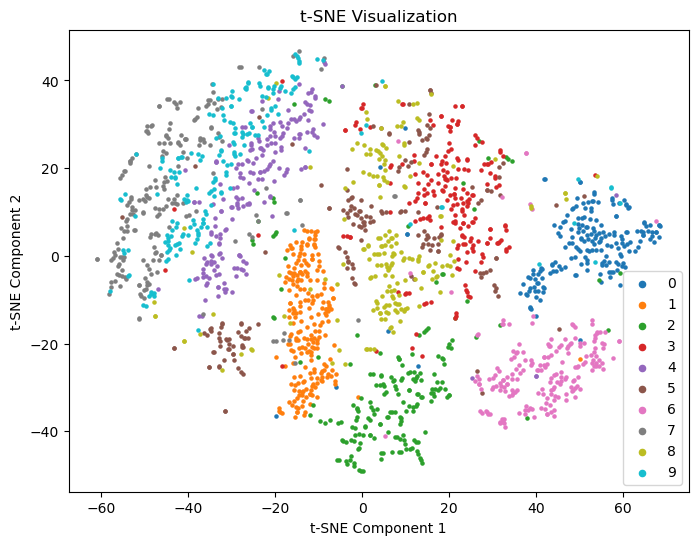

In [23]:
plt.figure(figsize=(8, 6))
colors = plt.get_cmap('tab10')
for class_value in np.unique(y_sample):
    indices = np.where(y_sample == class_value)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=str(class_value), s=5)

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(markerscale=2)
plt.show()


# SNE
Stochastic Neighbor Embedding (SNE) starts by converting the high-dimensional Euclidean distances between data points into conditional probabilities that represent similarities.
